In [49]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import re

from tqdm import tqdm

import matplotlib.pyplot as plt


import sys
sys.path.append('/Users/rdcrlzh1/Documents/SWE_error_analysis/src')
from swe_retrievals import swe_from_phase
from non_snow_retrievals import precipitable_water, ionospheric_advance, dry_atmosphere

In [ ]:
pw = xr.open_dataarray('/Users/rdcrlzh1/Documents/SWE_error_analysis/local/pw/pw.nc') / 1000 # convert from mm to meters
ion = xr.open_dataarray('/Users/rdcrlzh1/Documents/SWE_error_analysis/local/ionosphere/am_ion.nc') * 1e16 # convert from TECU to TEC
am_pressure = xr.open_dataarray('/Users/rdcrlzh1/Documents/SWE_error_analysis/local/pressure/ams.nc').sortby('time')

In [79]:
ymin = 32
ymax = 72
x = -111
pw_transect = pw.sel(lat = slice(ymin, ymax)).sel(lon = x, method = 'nearest')
ion_transect = ion.sel(y = slice(ymax, ymin)).sel(x = x, method = 'nearest')
pressure_transect = am_pressure.sel(lat = slice(ymin, ymax)).sel(lon = x, method = 'nearest')

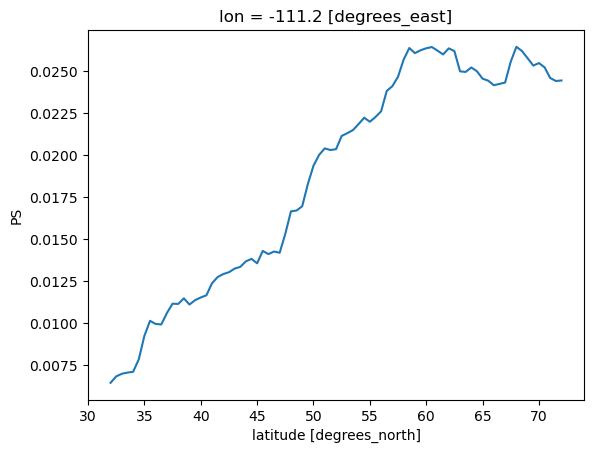

In [84]:
swe_from_phase(dry_atmosphere(np.abs(pressure_transect - pressure_transect.shift(time=12)).median('time'))).plot(label = 'pressure')


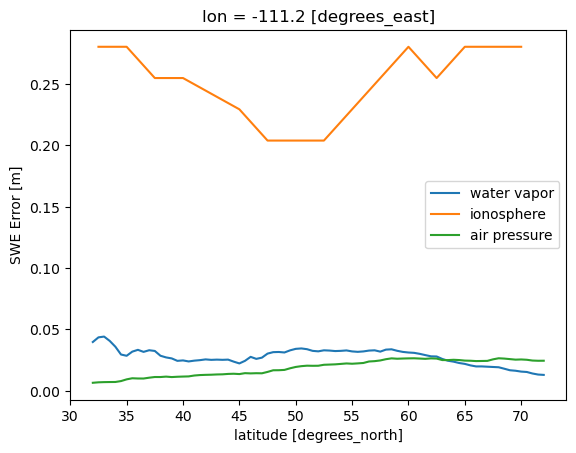

In [89]:
for transect, function, label in zip([pw_transect, ion_transect, pressure_transect], [precipitable_water, ionospheric_advance, dry_atmosphere], ['water vapor', 'ionosphere', 'air pressure']):
    median_12day_diff = np.abs(transect - transect.shift(time = 12)).median('time')
    median_12day_swe_error = swe_from_phase(function(median_12day_diff))
    median_12day_swe_error.plot(label = label)
# swe_from_phase(precipitable_water(np.abs(pw_transect - pw_transect.shift(time=12)).median('time')).plot(label = 'water vapor')
# swe_from_phase(ionospheric_advance(np.abs(ion_transect - ion_transect.shift(time=12)).median('time'))).plot(label = 'ionosphere')
plt.ylabel('SWE Error [m]')
plt.legend()